<a id="top"></a>
<p style="font-size:32px; text-align:center"> Explorations in Envy-Free Allocations  </p>

<p style="font-size:20px; text-align:center"> Chris Landgrebe, Calvin Suster, Wyatt Walsh</p>


This is the accompanying notebook to the paper, *Explorations in Envy-Free Allocations*. Here one can view the results datasets and visualizations created for them. Each dataset from the discussion in the paper are loaded for any further manipulation and can be found with the mapping: 


<center>
    
| Dataset                                                                                                                 | Variable    |
|-------------------------------------------------------------------------------------------------------------------------|-------------|
| [Approximate Envy-Freeness](#approximate-envy-freeness)                                                                 | `aef`       |
| [Approximate Envy-Freeness Up to One Item](#approximate-envy-freeness-up-to-one-item)                                   | `aef1`      |
| [Approximate Envy-Freeness With a Subsidy](#approximate-envy-freeness-with-a-subsidy)                                   | `aefs`      |
| [Approximate Envy-Freeness - Upper-Bound](#approximate-envy-freeness-upper-bound)                                       | `aef_ub`    |
| [Approximate Envy-Freeness - Starting Solution](#approximate-envy-freeness-starting-solution)                           | `aef_ss`    |
| [Approximate Envy-Freeness - Upper-Bound & Starting Solution](#approximate-envy-freeness-upper-bound-starting-solution) | `aef_ub_ss` |
| [Approximate Envy-Freeness - Tuned Solver Parameters](#approximate-envy-freeness-tuned)                                 | `aef_t`     |
    
</center>


The visualizations that were made include:
- a summary of the solver outcomes for all of the datasets in table form
- full outcomes of the solver for the different combinations of people and items
    - This includes a built-in heatmap for the associated p-Envy-Free value, solver time expended, number of people and number of items
- bar chart of solver elapsed time for different values of people, grouped over differing numbers of items
- bar chart of allocation p-Envy-Free value for different values of people, grouped over differing numbers of items
- heat maps of mean allocation p-Envy-Free value and mean solver elapsed time for different values of people and items
- triangulated surface plots of solver elapsed time and allocation p-Envy-Free value
- scatter plots of mean allocation p-Envy-Free value and mean solver elapsed time for different values of people and items
- parallel categories diagrams of mean allocation p-Envy-Free value and mean solver elapsed time for different values of people and items

The functions used to create these visualizations can be found in the python script, `visualizations.py`, located in the `python_functions` directory within the `src` directory.

In [101]:
%matplotlib notebook
import pandas as pd
import ipywidgets as widgets
from IPython.display import HTML, Image, display
from src.python_functions.visualization import *

def plot_3d(data, type_of, cash=None, name=None,save=False):
    plt.close()
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    p = ax.plot_trisurf(data['Number of Items'],
                         data['Number of People'],
                         data[type_of],
                         cmap=plt.cm.jet,
                         linewidth=0.01)
    if cash != None:
        title = "{} Triangular Surface Plot (${})".format(type_of, cash)
        ax.text2D(0.1, 0.95, title, transform=ax.transAxes, fontsize=10)
    else:
        title = "{} Triangular Surface Plot".format(type_of)
        ax.text2D(0.1, 0.95, title, transform=ax.transAxes, fontsize=12)

    
    if type_of == 'Solver Elapsed Time':
        ax.set_zlim(0,max(data['Solver Elapsed Time']))
        label = type_of + ' (s)'
    else:
        ax.set_zlim(0, 1)
        label = type_of
    plt.draw()
    ax.set_xlabel('Number of Items',fontdict={'fontsize': 10})
#     ax.set_xticklabels(ax.get_xticklabels(),fontsize=6)
    ax.set_ylabel('Number of People',fontdict={'fontsize': 10})
#     ax.set_yticklabels(ax.get_yticklabels(),fontsize=6)
    ax.set_zlabel(label,fontdict={'fontsize': 10})
#     ax.set_zticklabels(ax.get_zticklabels(),fontsize=6)
    ax.xaxis.labelpad=-7
    ax.yaxis.labelpad=-7
    ax.zaxis.labelpad=-7
    ax.tick_params(axis='x', pad=-5, labelsize = 6)
    ax.tick_params(axis='y', pad=-5, labelsize = 6)
    ax.tick_params(axis='z', pad=-2, labelsize = 6)
    plt.margins(-0.4,0,0)
    if save:
        if type_of == "Solver Elapsed Time":
            to_save = "time"
        else:
            to_save = 'envy'
        if cash != None:
            plt.tight_layout(pad=0)
            ax.get_figure().savefig("./visualizations/surfaceplots/{}_{}_{}".format(
            name, to_save, cash),
                               dpi=300, bbox_inches='tight', pad_inches=-0.075)
        else:
            plt.tight_layout(pad=0)
            ax.get_figure().savefig("./visualizations/surfaceplots/{}_{}".format(
                name, to_save),
                                   dpi=300, bbox_inches='tight', pad_inches=-0.075)
    

display(
    HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

display(
    HTML("""
<style>
div.jupyter-widgets.widget-label {display: none;}
.widget-label { min-width: 20ex !important; }
.layout {height: 100%; width: 100%;}
div.ui-dialog-titlebar {display: none;}
</style>
"""))

plt.ioff() 

<a id="approximate-envy-freeness"></a>
# Approximate Envy-Freeness

In [82]:
aef = tabular_statistics('./data/output/q1/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness',
                             'Results of MILP for Approximate Envy-Freeness')[0]

In [83]:
results, grouped = tabular_statistics('./data/output/q1/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness',
                             'Results of MILP for Approximate Envy-Freeness')[1:]
display(grouped)

In [84]:
display(results)

<img src="./visualizations/barcharts/aef_envy.png" width="800"/>
<img src='./visualizations/barcharts/aef_time.png' width="800"/>
<img src='./visualizations/heatmaps/aef_envy.png' width="500"/>
<img src='./visualizations/heatmaps/aef_time.png' width="500"/>

<IPython.core.display.Javascript object>


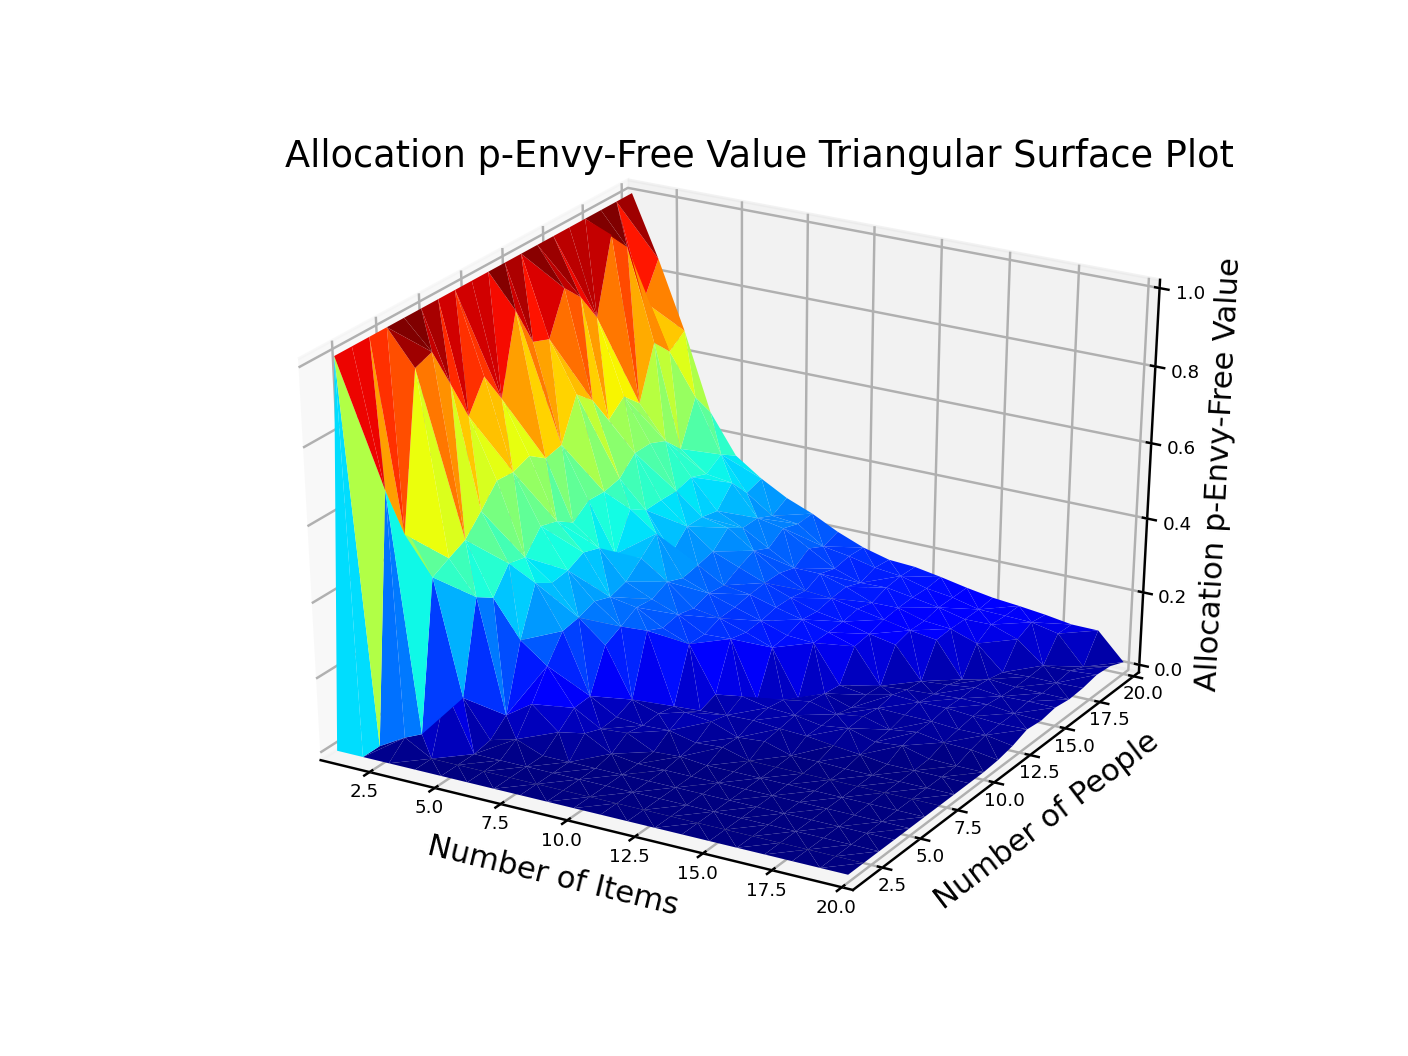

In [88]:
# %matplotlib widget
# %matplotlib widget
plot_3d(aef, "Allocation p-Envy-Free Value");

<IPython.core.display.Javascript object>


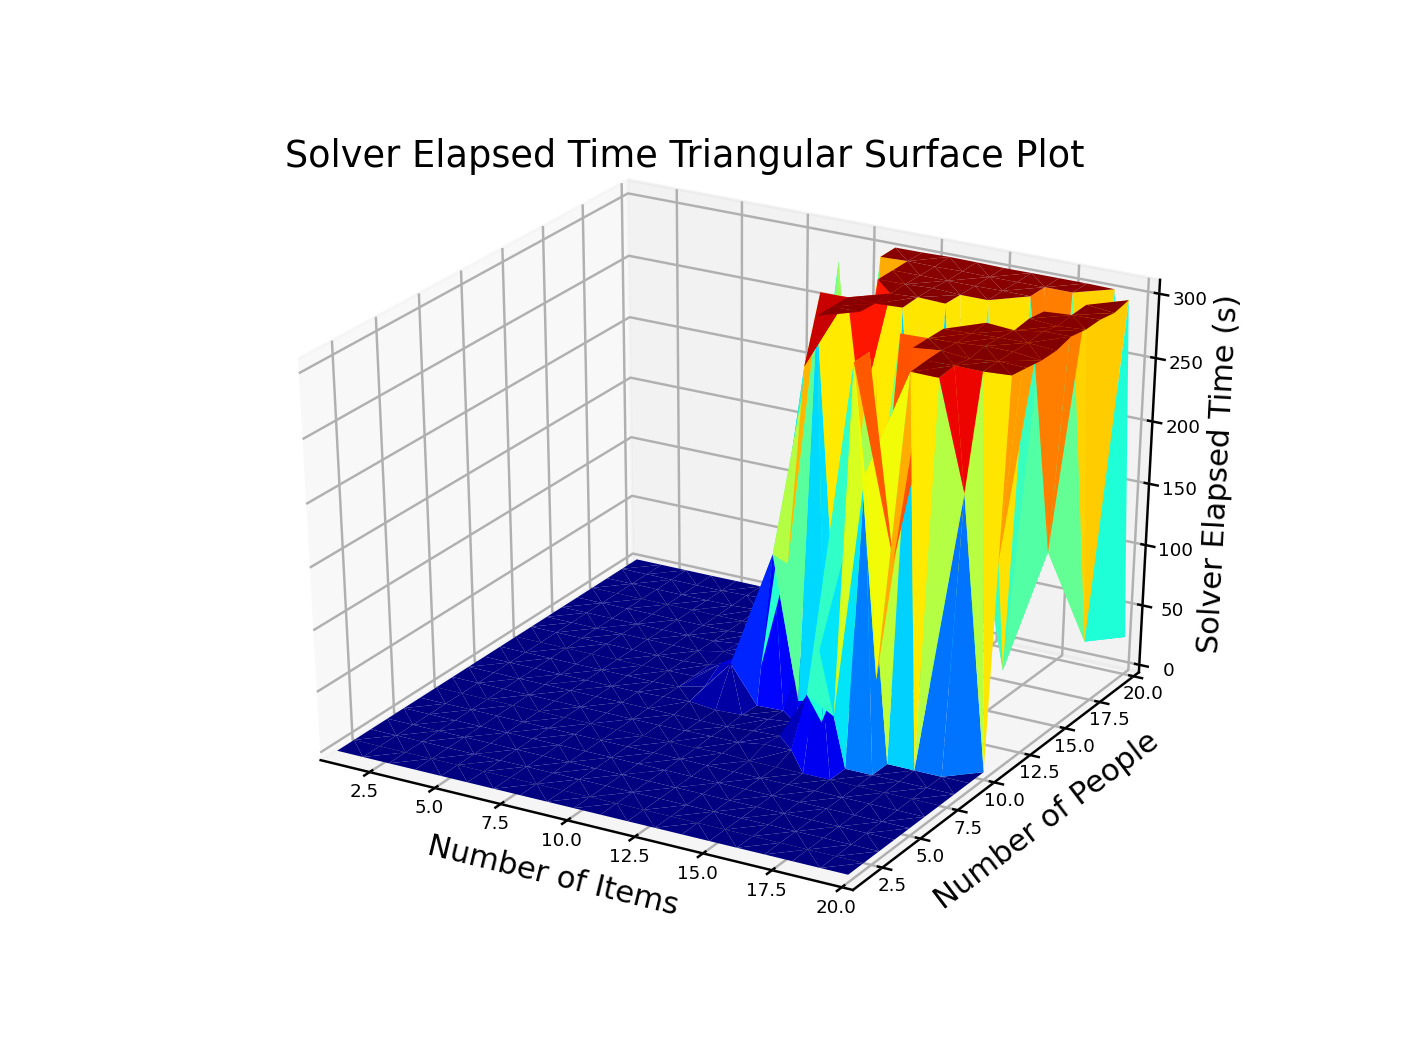

In [86]:
# %matplotlib widget
plot_3d(aef, 'Solver Elapsed Time');

<img src='./visualizations/scatterplots/aef.png' width="800"/>
<img src='./visualizations/parallelcategories/aef_envy.png'width="800"/>
<img src='./visualizations/parallelcategories/aef_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-up-to-one-item"></a>
# Approximate Envy-Freeness Up to One Item

In [89]:
aef1 = tabular_statistics('./data/output/q2/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness Up to One Item',
                             'Results of MILP for Approximate Envy-Freeness Up to One Item')[0]

In [90]:
results, grouped = tabular_statistics('./data/output/q2/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness Up to One Item',
                             'Results of MILP for Approximate Envy-Freeness Up to One Item')[1:]
display(grouped)

In [91]:
display(results)

<img src='./visualizations/barcharts/aef1_envy.png' width='800'/>
<img src='./visualizations/barcharts/aef1_time.png' width="800"/>
<img src='./visualizations/heatmaps/aef1_envy.png' width="500"/>
<img src='./visualizations/heatmaps/aef1_time.png' width="500"/>

<IPython.core.display.Javascript object>


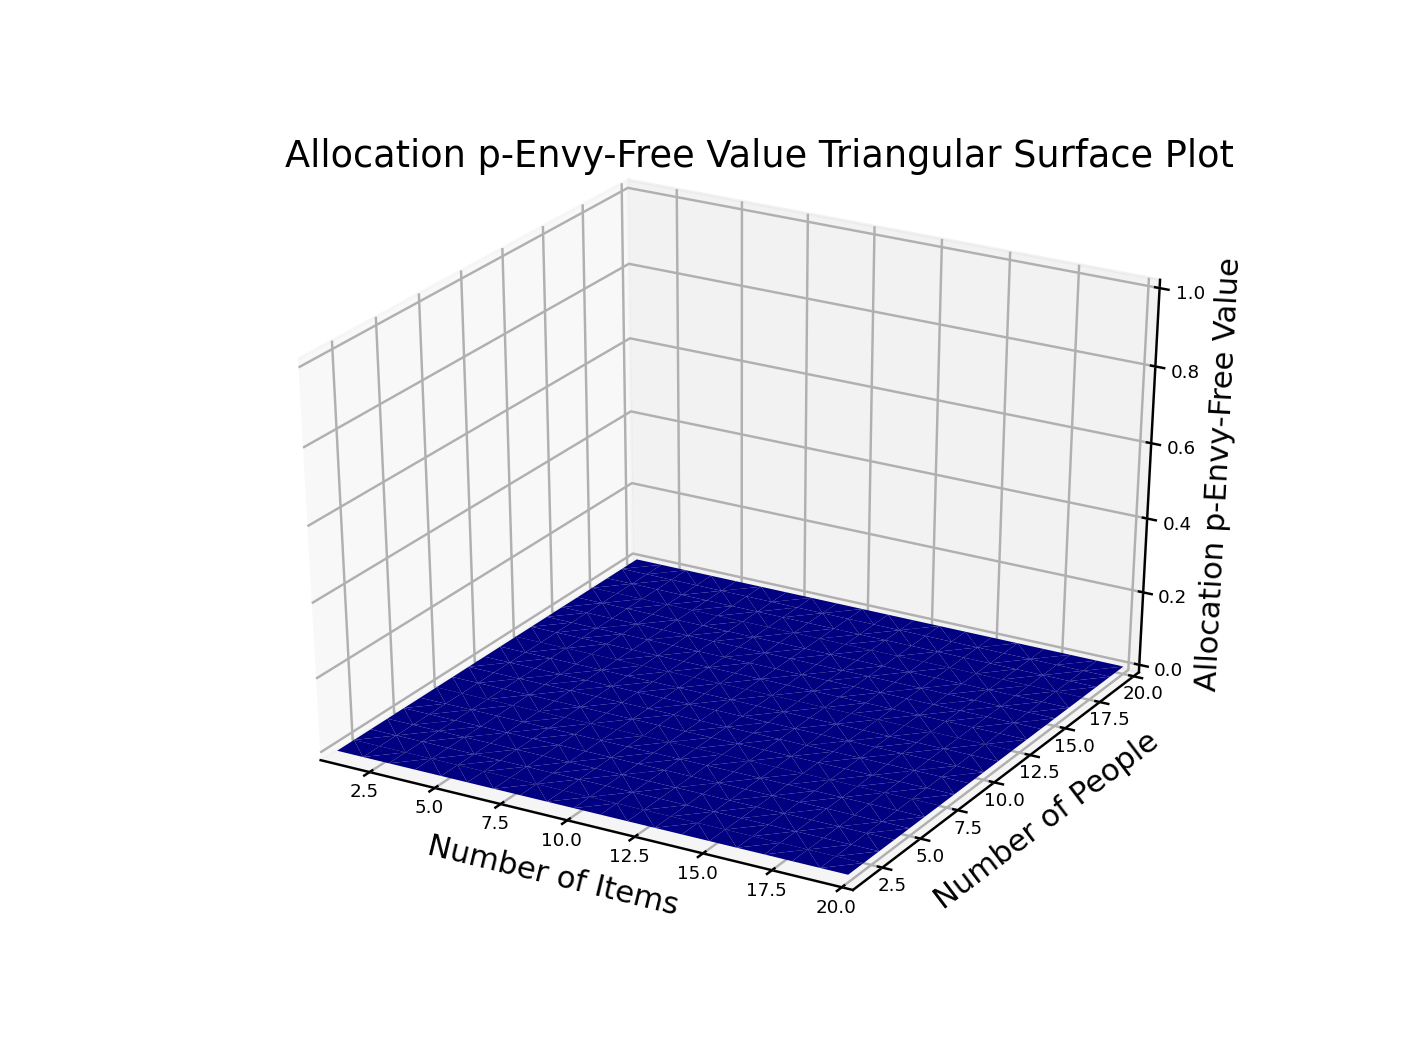

In [92]:
# %matplotlib widget
plot_3d(aef1, 'Allocation p-Envy-Free Value');

<IPython.core.display.Javascript object>


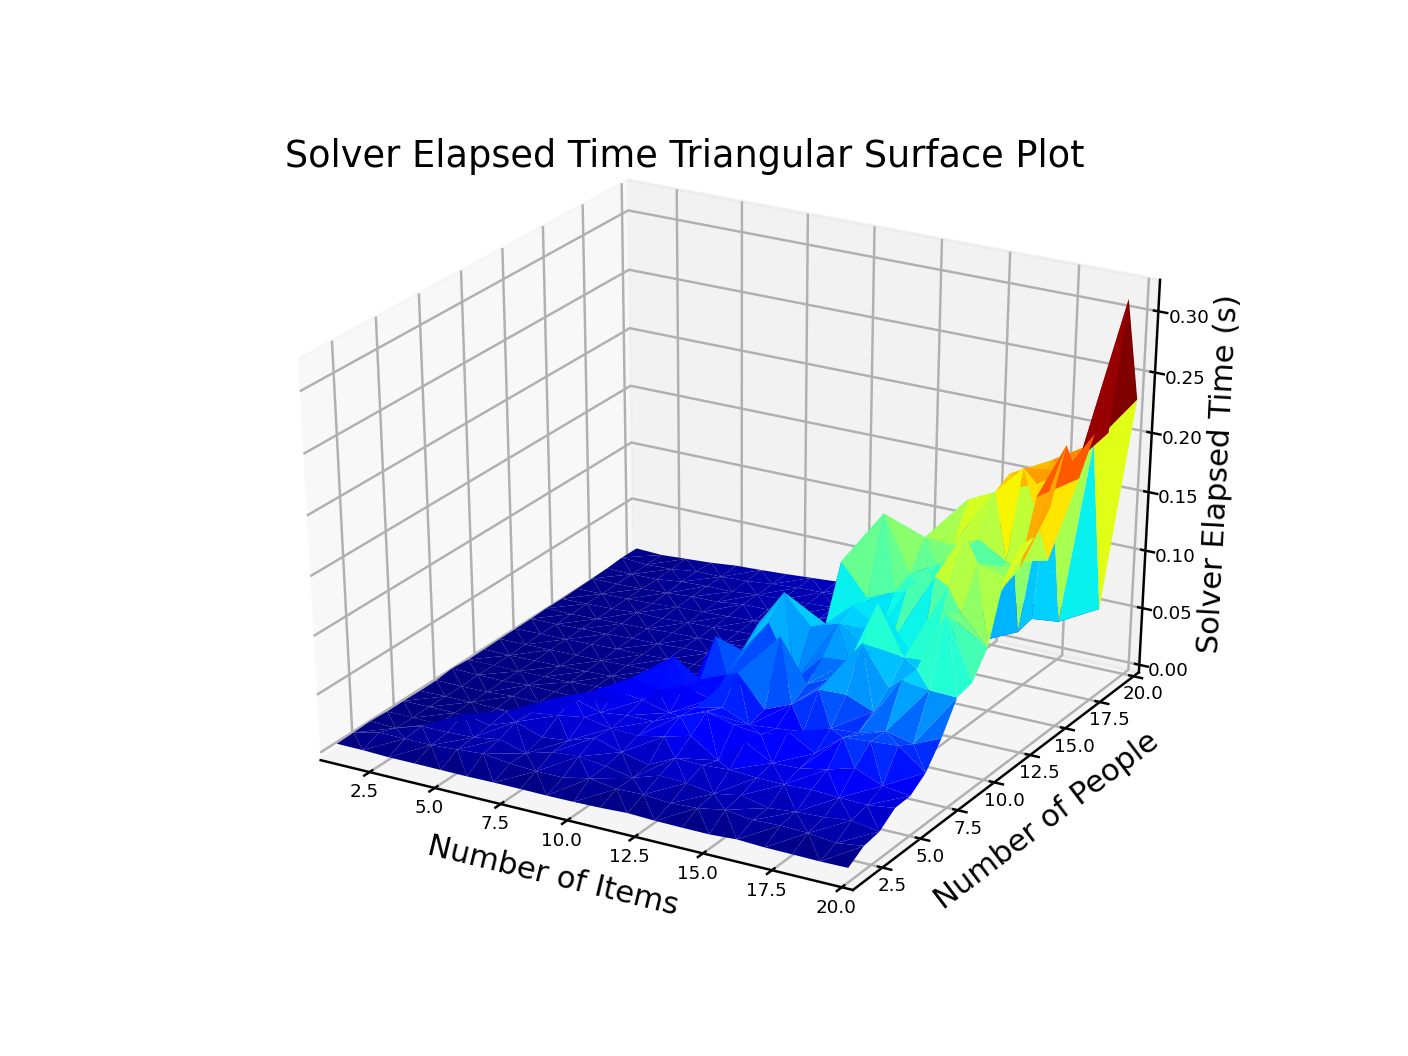

In [93]:
# %matplotlib widget
plot_3d(aef1, 'Solver Elapsed Time');

<img src='./visualizations/scatterplots/aef1.png' width="800"/>
<img src='./visualizations/parallelcategories/aef1_envy.png'width="800"/>
<img src='./visualizations/parallelcategories/aef1_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-with-a-subsidy"></a>
# Approximate Envy-Freeness With a Subsidy

In [94]:
aefs = tabular_statistics('./data/output/q3/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness With a Cash Subsidy',
                             'Results of MILP for Approximate Envy-Freeness With a Cash Subsidy', cash=True)[0]

In [95]:
results, grouped = tabular_statistics('./data/output/q3/results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness With a Cash Subsidy',
                             'Results of MILP for Approximate Envy-Freeness With a Cash Subsidy', cash=True)[1:]
display(grouped)

In [96]:
display(results)

In [97]:
# %matplotlib widget
def show_plot1(val):
    plot_3d(aefs.loc[aefs['Subsidy Amount'] == val], 'Allocation p-Envy-Free Value', val)

widgets.interact(show_plot1, val=widgets.SelectionSlider(description='Subsidy Value', 
                                                   options=[50,100,150,200,250,300,400,600,800]));

interactive(children=(SelectionSlider(description='Subsidy Value', options=(50, 100, 150, 200, 250, 300, 400, …

In [98]:
# %matplotlib widget
def show_plot2(val):
    plot_3d(aefs.loc[aefs['Subsidy Amount'] == val], 'Solver Elapsed Time', val);

widgets.interact(show_plot2, val=widgets.SelectionSlider(description='Subsidy Value', 
                                                   options=[50,100,150,200,250,300,400,600,800]));

interactive(children=(SelectionSlider(description='Subsidy Value', options=(50, 100, 150, 200, 250, 300, 400, …

<img src='./visualizations/parallelcategories/aefs_envy.png' width="1000"/>
<img src='./visualizations/parallelcategories/aefs_time.png' width="1000"/>

<IPython.core.display.Javascript object>


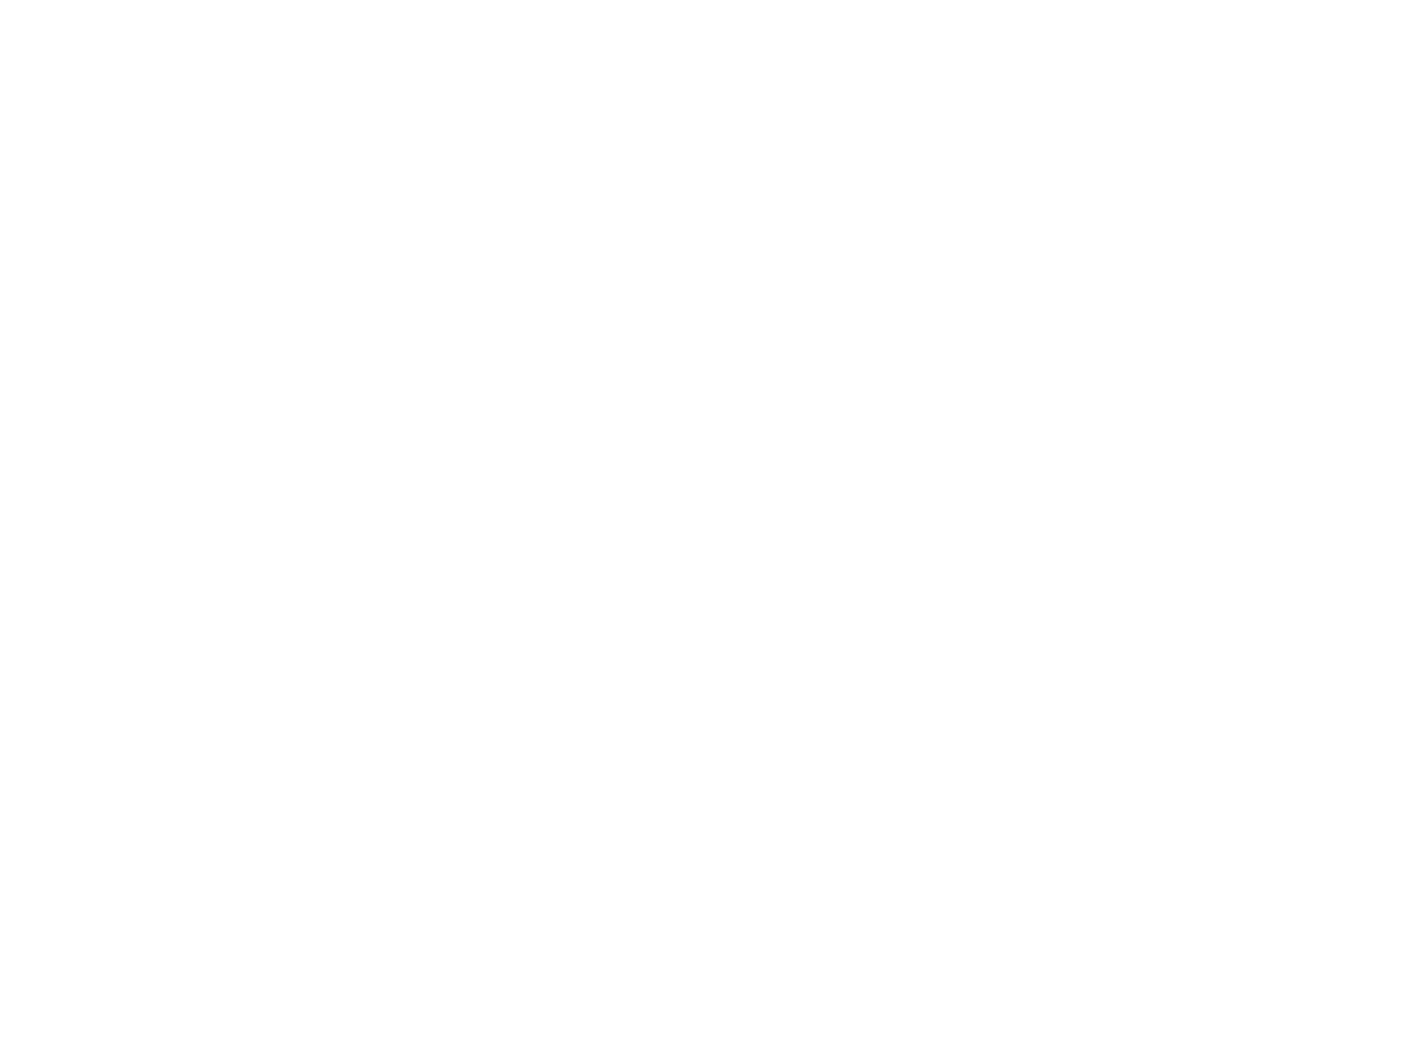

<IPython.core.display.Javascript object>


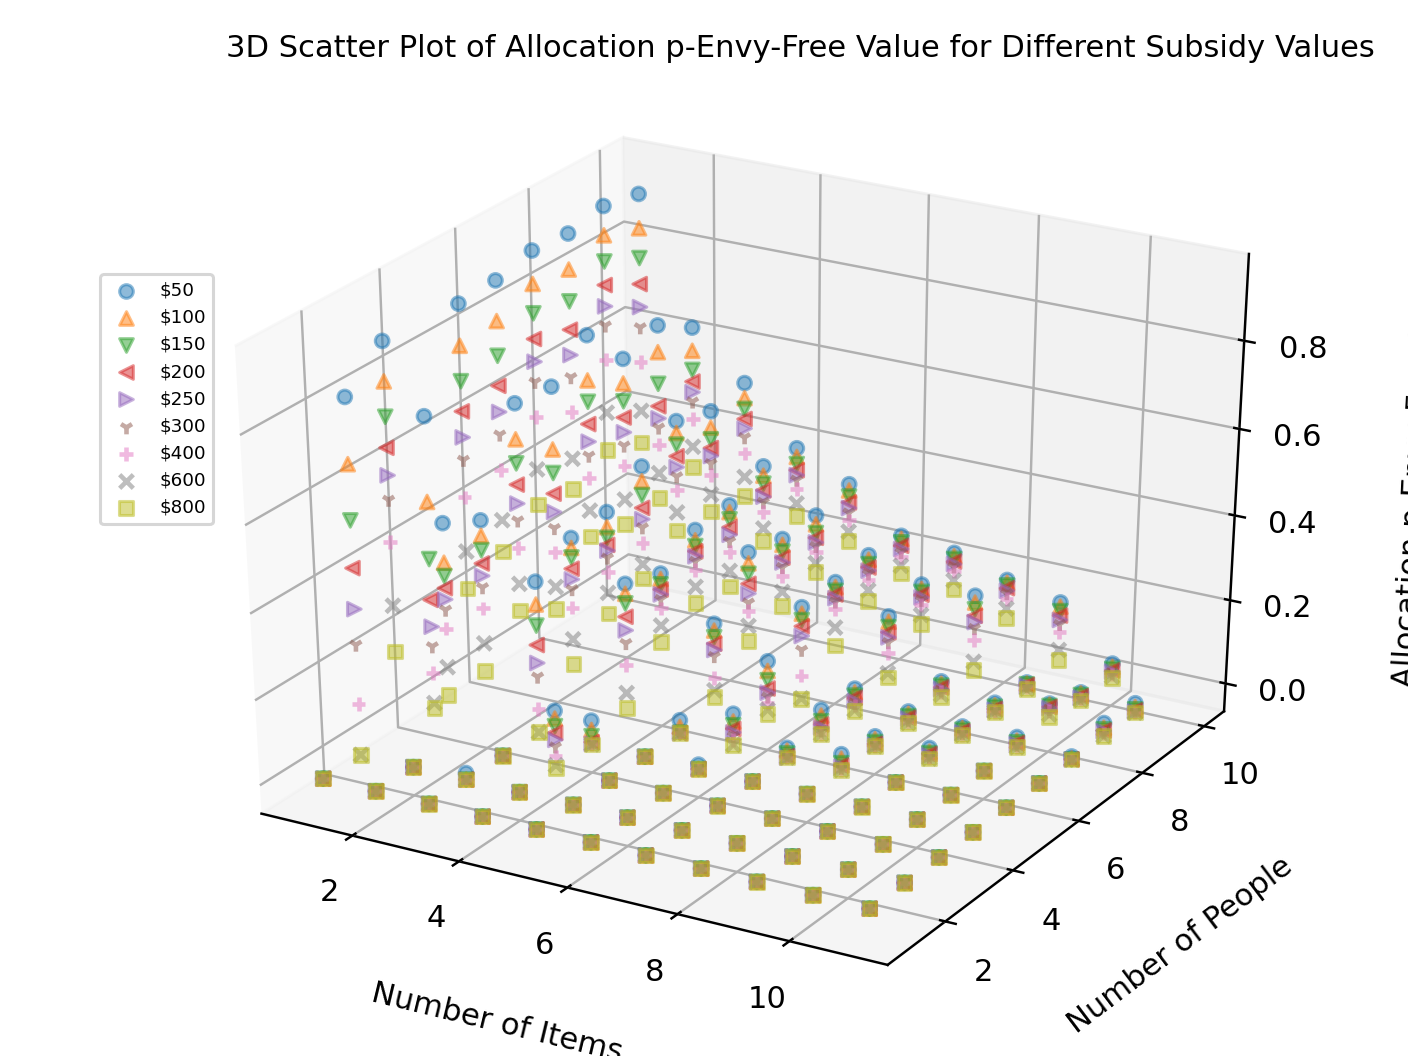

<IPython.core.display.Javascript object>


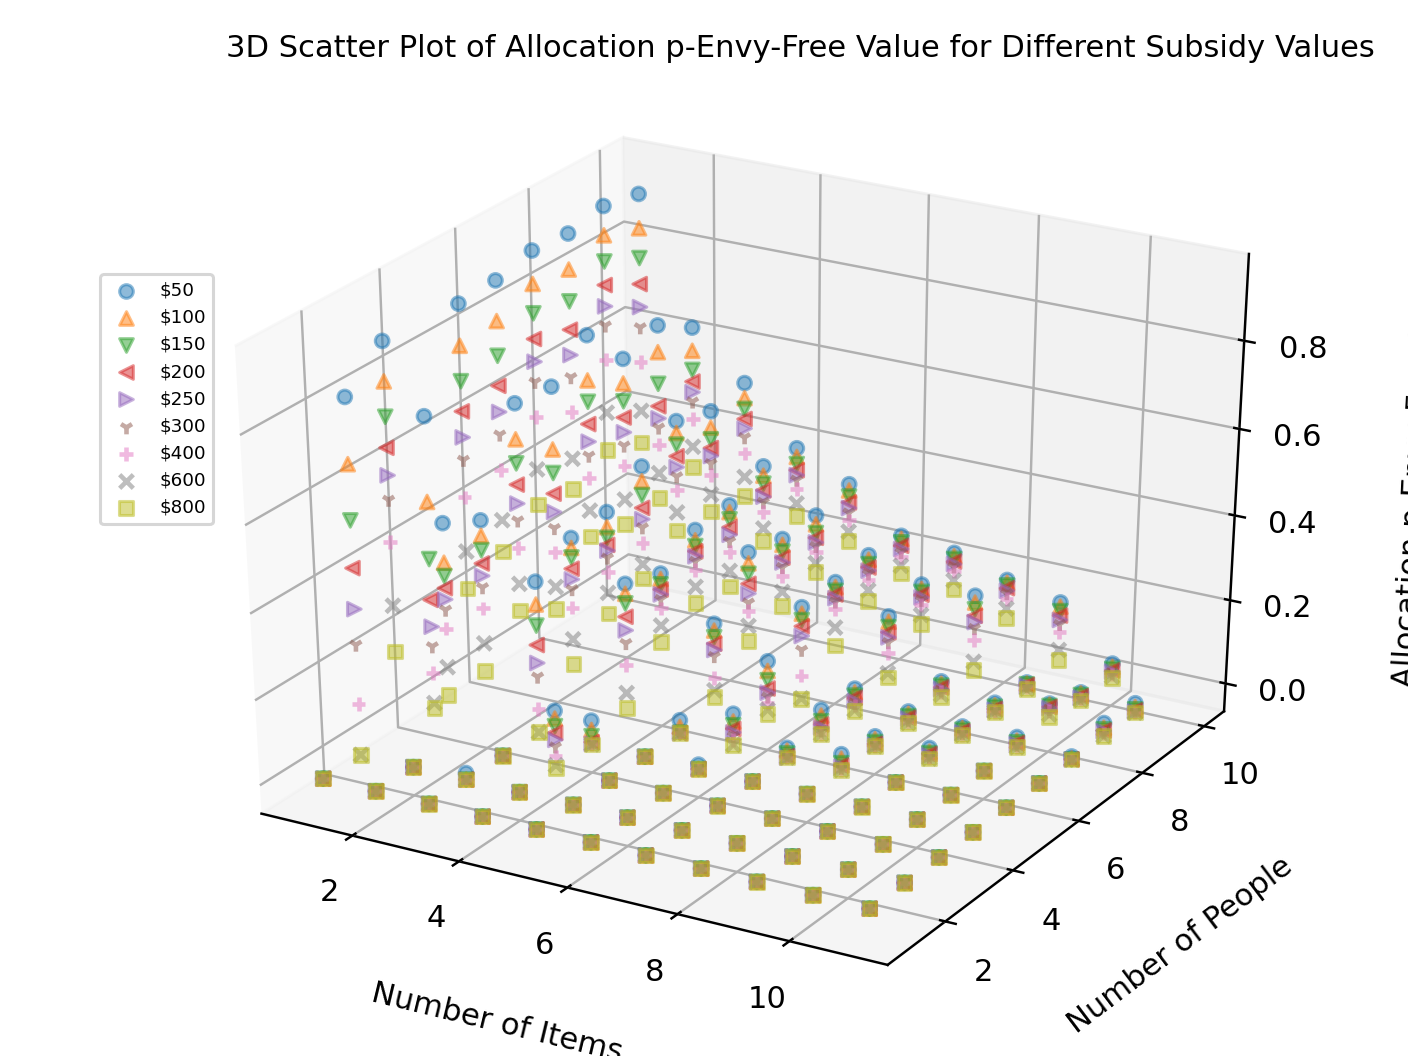

In [100]:
scatter_4d(aefs, 'Allocation p-Envy-Free Value')

In [ ]:
scatter_4d(aefs, 'Solver Elapsed Time')

[Back to Top](#top)

<a id="approximate-envy-freeness-upper-bound"></a>
# Approximate Envy-Freeness - Upper Bound

In [104]:
aef_ub = tabular_statistics('./data/output/q4/upper_bound_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[0]

In [105]:
results, grouped = tabular_statistics('./data/output/q4/upper_bound_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[1:]
display(grouped)

In [106]:
display(results)

<img src="./visualizations/barcharts/aef_ub_envy.png" width="800"/>
<img src='./visualizations/barcharts/aef_ub_time.png' width="800"/>

In [108]:
# %matplotlib widget
plot_3d(aef_ub, 'Allocation p-Envy-Free Value')

In [109]:
# %matplotlib widget
plot_3d(aef_ub, 'Solver Elapsed Time');

<img src='./visualizations/scatterplots/aef_ub.png' width="800"/>
<img src='./visualizations/heatmaps/aef_ub_envy.png' width="500"/>
<img src='./visualizations/heatmaps/aef_ub_time.png' width="500"/>
<img src='./visualizations/parallelcategories/aef_ub_envy.png'width="800"/>
<img src='./visualizations/parallelcategories/aef_ub_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-starting-solution"></a>
# Approximate Envy-Freeness - Starting Solution

In [110]:
aef_ss = tabular_statistics('./data/output/q4/start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Starting Solution')[0]

In [111]:
results, grouped = tabular_statistics('./data/output/q4/start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Starting Solution')[1:]
display(grouped)

In [112]:
display(results)

<img src="./visualizations/barcharts/aef_ub_envy.png" width="800"/>
<img src='./visualizations/barcharts/aef_ub_time.png' width="800"/>

In [113]:
# %matplotlib widget
plot_3d(aef_ss, 'Allocation p-Envy-Free Value');

In [114]:
# %matplotlib widget
plot_3d(aef_ss, 'Solver Elapsed Time');

<img src='./visualizations/scatterplots/aef_ss.png' width="800"/>
<img src='./visualizations/heatmaps/aef_ss_envy.png' width="500"/>
<img src='./visualizations/heatmaps/aef_ss_time.png' width="500"/>
<img src='./visualizations/parallelcategories/aef_ss_envy.png'width="800"/>
<img src='./visualizations/parallelcategories/aef_ss_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-upper-bound-starting-solution"></a>
# Approximate Envy-Freeness - Upper Bound & Starting Solution

In [115]:
aef_ub_ss = tabular_statistics('./data/output/q4/upper_bound_start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution')[0]

In [116]:
results, grouped = tabular_statistics('./data/output/q4/upper_bound_start_soln_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound & Starting Solution')[1:]
display(grouped)

In [117]:
display(results)

<img src="./visualizations/barcharts/aef_ub_ss_envy.png" width="800"/>
<img src='./visualizations/barcharts/aef_ub_ss_time.png' width="800"/>

In [118]:
# %matplotlib widget
plot_3d(aef_ub_ss, 'Allocation p-Envy-Free Value')

In [119]:
# %matplotlib widget
plot_3d(aef_ub_ss, 'Solver Elapsed Time');

<img src='./visualizations/scatterplots/aef_ub_ss.png' width="800"/>
<img src='./visualizations/heatmaps/aef_ub_ss_envy.png' width="500"/>
<img src='./visualizations/heatmaps/aef_ub_ss_time.png' width="500"/>
<img src='./visualizations/parallelcategories/aef_ub_ss_envy.png'width="800"/>
<img src='./visualizations/parallelcategories/aef_ub_ss_time.png'width="800"/>

[Back to Top](#top)

<a id="approximate-envy-freeness-tuned"></a>
# Approximate Envy-Freeness - Tuned Solver Parameters

In [ ]:
aef_t = tabular_statistics('./data/output/q4/tuned_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[0]

In [ ]:
results, grouped = tabular_statistics('./data/output/q4/tuned_results.txt',
                             'Summary of Results of MILP for Approximate Envy-Freeness - Upper Bound',
                             'Results of MILP for Approximate Envy-Freeness - Upper Bound')[1:]
display(grouped)

In [ ]:
display(results)

<img src="./visualizations/barcharts/aef_ub_ss_envy.png" width="800"/>
<img src='./visualizations/barcharts/aef_ub_ss_time.png' width="800"/>

In [118]:
# %matplotlib widget
plot_3d(aef_t, 'Allocation p-Envy-Free Value')

In [119]:
# %matplotlib widget
plot_3d(aef_t, 'Solver Elapsed Time');

<img src='./visualizations/scatterplots/aef_ub_ss.png' width="800"/>
<img src='./visualizations/heatmaps/aef_ub_ss_envy.png' width="500"/>
<img src='./visualizations/heatmaps/aef_ub_ss_time.png' width="500"/>
<img src='./visualizations/parallelcategories/aef_ub_ss_envy.png'width="800"/>
<img src='./visualizations/parallelcategories/aef_ub_ss_time.png'width="800"/>

[Back to Top](#top)